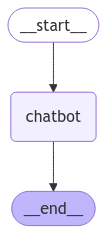

In [4]:
from typing import TypedDict, Annotated

from langchain_ollama import ChatOllama
from langgraph.constants import START, END
from langgraph.graph import StateGraph


class State(TypedDict):
    messages: Annotated[list, "messages"]


graph_builder = StateGraph(State)

llm = ChatOllama(model="exaone3.5:7.8b")


def chatbot(state: State) -> dict:
    return {
        "messages": llm.invoke(state["messages"]),
    }


graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

from IPython.core.display import Image

graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({
        "messages": [
            {"role": "system", "content": "You are a helpful assistant. Always answer in Korean."},
            {"role": "user", "content": user_input},
        ]
    }):
        for value in event.values():
            print("Assistant:", value["messages"].content)


while True:
    # Tell me a short story nobody know.
    user_input = input("Human:")
    if user_input == "exit":
        break

    stream_graph_updates(user_input)

Assistant: 오래된 마을 한구석에 숨겨진 작은 동굴이 있었어요. 그 동굴 입구에는 오래된 나무 문이 하나 있었는데, 마을 사람들은 그 문이 항상 살짝 열려 있어도 전혀 이상하게 생각하지 않았죠. 어느 흐린 가을 밤, 소녀 지혜는 호기심에 휩싸여 그 동굴을 찾아갔어요. 문을 조심스럽게 밀어 열고 안으로 들어서자, 그곳은 마치 시간이 멈춘 듯 조용했습니다. 동굴 안쪽에는 희미한 불빛 아래로 오래된 책들이 쌓여 있었고, 그 중 하나가 살짝 빛나고 있었어요. 지혜가 그 책을 집어 들자, 갑자기 주변이 밝아지며 신비로운 음악이 들려왔어요. 책을 펼치자 그 순간, 지혜는 책 속의 이야기 속으로 빨려 들어가듯이 다른 세상으로 이동하게 되었어요. 그곳은 그녀가 상상했던 것보다 훨씬 더 아름답고 신비로웠죠. 얼마 후, 지혜는 다시 현실로 돌아왔을 때, 그녀의 눈빛은 더 깊은 지식과 신비로움으로 반짝였어요. 그 후로 지혜는 그 동굴을 자주 찾아갔지만, 아무도 그 이야기를 모르고 있었죠. 마을 사람들은 그저 지혜가 때때로 신비로운 이야기를 들려주는 것만 알았을 뿐이었어요.
